# Network Science H21: Assignment 2 (by Jan Bauer 18-764-571)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean
from scipy.interpolate import make_interp_spline
import seaborn as sns
sns.set_palette("bright")

## Functions

In [2]:
def avg(lst):
    return sum(lst) / len(lst)

In [3]:
def randomize_graph(graph):
    return nx.algorithms.smallworld.random_reference(graph, niter=10, connectivity=False, seed=42)

In [4]:
def plot_degree_distribution(deg, xscale='linear', yscale='linear', bins=30, density=True):
    fig, ax = plt.subplots()
    title = "Degree Distribution "

    average_degree = avg(deg)
    print("Average Degree: {}".format(average_degree))
    if xscale == 'log':
        title+="Log"
        binlog = np.logspace(np.log10(min(deg)),np.log10(max(deg)), bins)
        plt.axvline(x=average_degree, ymin=0, ymax=1, color="Red")
        plt.hist(deg, binlog, density = density, alpha=0.5)

    else:
        title+="Lin"
        plt.axvline(x=average_degree, ymin=0, ymax=1, color="Red")
        plt.hist(deg, bins = bins, density = density, alpha=0.5)
        
    if yscale == 'log':
        title+="-Log Scale"
    else:
        title+="-Lin Scale"
        
    plt.xlabel('k')
    plt.ylabel("P(k)")
    
    plt.xscale(xscale)
    plt.yscale(yscale)
    plt.title(title)
    plt.show() 

In [5]:
def degree_to_avg_adj_degree(graph):
    average_neighbor_degrees = list(nx.average_neighbor_degree(graph).values())
    node_degrees = graph.degree()
    node_degrees = [node_degrees[i] for i in graph.nodes()]
    unique_node_degrees = np.unique(node_degrees)
    degree_to_neighbor_degrees = {ndg:[] for ndg in unique_node_degrees}
    
    for i in range(len(node_degrees)):
       node_degree = node_degrees[i]
       average_neighbor_degree = average_neighbor_degrees[i] 
       degree_to_neighbor_degrees[node_degree].append(average_neighbor_degree)
    
    average_neighbor_degrees = [mean(v) for k, v in degree_to_neighbor_degrees.items()]
    return unique_node_degrees, average_neighbor_degrees

In [6]:
def scatterplot_degree_to_avg_adj_degree(graph, order=4):
    unique_node_degrees, average_neighbor_degrees = degree_to_avg_adj_degree(graph)
    sns.regplot(x=unique_node_degrees, y=average_neighbor_degrees, scatter_kws={"s": 20}, line_kws={"color": "red"}, order=order, ci=None)
    plt.xlabel("k")
    plt.ylabel("<k_nn(k)>")
    plt.title("Scatterplot: Node Degree vs Average Neighbor Node Degree")
    plt.show()

In [7]:
# define a function to plot 𝑘𝑛𝑛(𝑘) as a function of the vertices degree 𝑘
def histplot_degree_to_avg_adj_degree(graph):
    knn_list = [j for i,j in nx.average_degree_connectivity(graph).items()] # unpack the degrees to a list from dict
    my_bins = np.logspace(np.log10(min(knn_list)), np.log10(max(knn_list) + 1), 30) # binning to facilitate mapping
    _ = plt.hist(knn_list, bins = my_bins, density = True)
    plt.xscale('log')
    plt.yscale('log')
    plt.title("Histogram: Node Degree vs Average Neighbor Node Degree")
    plt.xlabel('k')
    plt.ylabel('<k_nn(k)>')
    plt.show()

In [8]:
def plot_k_to_k_rand(x, y):
    sns.scatterplot(x=x, y=y)
    plt.xlabel("C(i)", size=12)
    plt.ylabel("C_RND(i)", size=12)
    plt.title("Clustering Coefficients for Node i in G and G_RND", size=12)

In [1]:
def analyze_graph(graph_path, graph_name):
    print("--- {} ---".format(graph_name))
    graph = nx.read_gml(graph_path)
    assortativity_coefficient = nx.degree_assortativity_coefficient(graph)
    print("Assortativity Coefficient of G: {}".format(assortativity_coefficient))
    unique_node_degrees, average_neighbor_degrees = degree_to_avg_adj_degree(graph)
    scatterplot_degree_to_avg_adj_degree(graph)
    histplot_degree_to_avg_adj_degree(graph)
    
    #randomized_graph = nx.read_gml("./data_random/graph_{}_random.gml".format(graph_name))
    #assortativity_coefficient = nx.degree_assortativity_coefficient(randomized_graph)
    #print("Assortativity Coefficient of G_RND: {}".format(assortativity_coefficient))
    
    return graph

In [10]:
def show_degree_distribution(graph, randomized_graph):
    graph_clustering_coefficients = list(nx.clustering(graph).values())
    randomized_graph_clustering_coefficients = list(nx.clustering(randomized_graph).values())
    plot_k_to_k_rand(graph_clustering_coefficients, randomized_graph_clustering_coefficients)

## 1. AstroPhysics Arxiv Collaborations

--- AstroPh Graph ---
Assortativity Coefficient of G: 0.2013170612737268


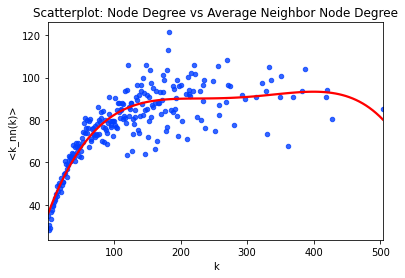

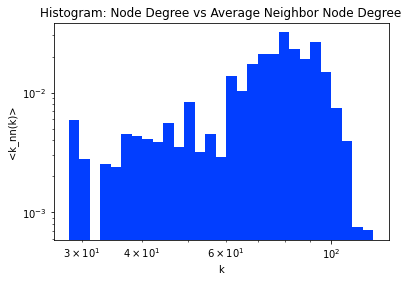

--- Randomized AstroPh Graph ---
Assortativity Coefficient of G: 0.016786718783262822


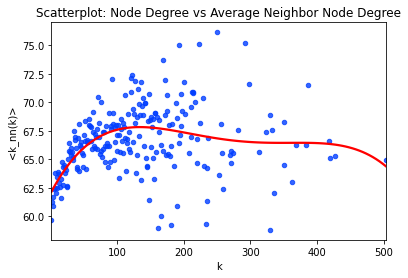

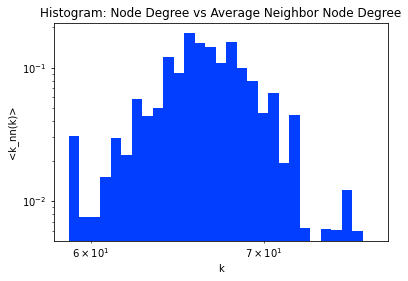

In [11]:
astroph_graph = analyze_graph("./data/graph_AstroPh.gml", "AstroPh Graph")
randomized_astroph_graph = analyze_graph("./data_random/graph_AstroPh_random.gml", "Randomized AstroPh Graph")

Average Degree: 22.004356811707535


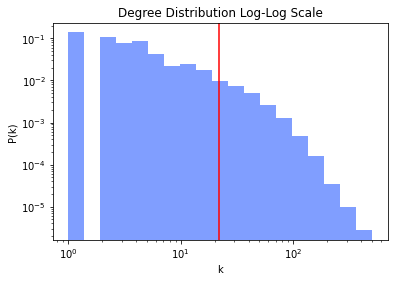

In [12]:
astroph_graph_degrees = [astroph_graph.degree()[i] for i in astroph_graph.nodes()]
plot_degree_distribution(astroph_graph_degrees, xscale='log', yscale='log', bins=20)

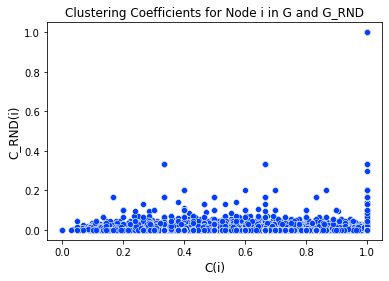

In [13]:
show_degree_distribution(astroph_graph, randomized_astroph_graph)

## 2. C. Elegans Interactomes

--- Celegans Interactomes Graph ---
Assortativity Coefficient of G: 0.15169796960230708


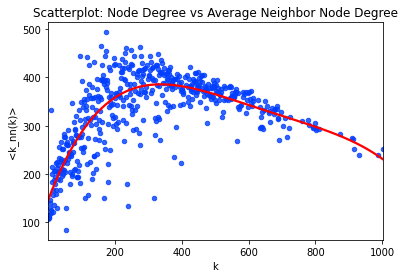

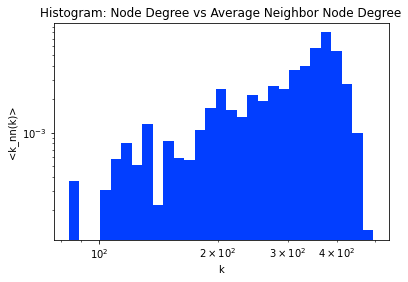

--- Randomized Celegans Interactomes Graph ---
Assortativity Coefficient of G: -0.16041270078807618


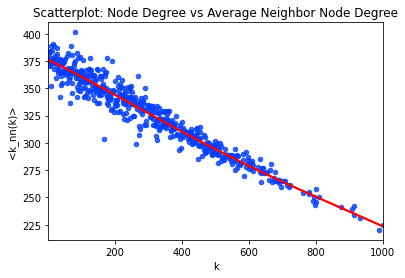

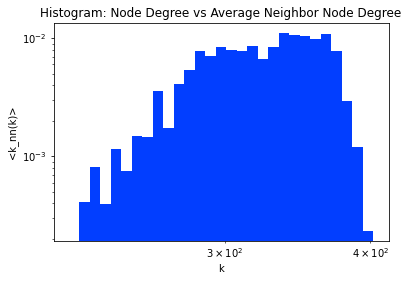

In [14]:
celegans_graph = analyze_graph("./data/graph_celegansInteractomes.gml", "Celegans Interactomes Graph")
randomized_celegans_graph = analyze_graph("./data_random/graph_celegansInteractomes_random.gml", "Randomized Celegans Interactomes Graph")

Average Degree: 59.39021119678176


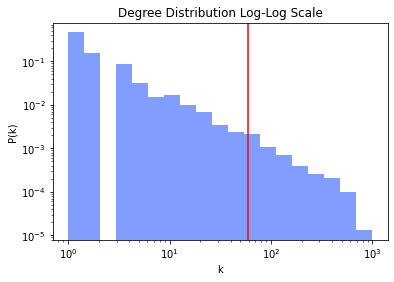

In [15]:
celegans_graph_degrees = [celegans_graph.degree()[i] for i in celegans_graph.nodes()]
plot_degree_distribution(celegans_graph_degrees, xscale='log', yscale='log', bins=20)

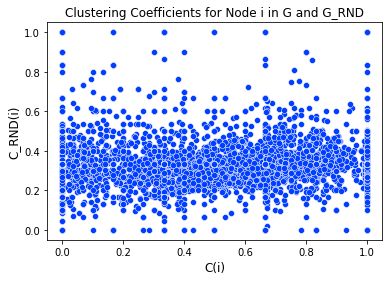

In [16]:
show_degree_distribution(celegans_graph, randomized_celegans_graph)

## 3. Kaggle chess players

--- Chess Graph ---
Assortativity Coefficient of G: 0.3705153782729767


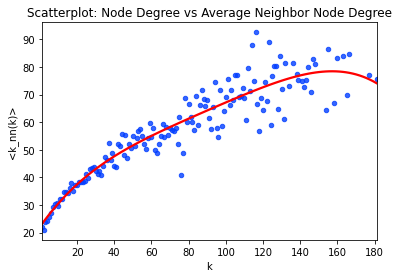

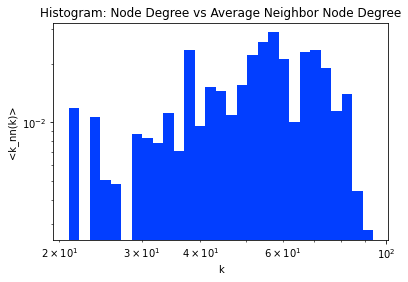

--- Randomized Chess Graph ---
Assortativity Coefficient of G: 0.04041683046547415


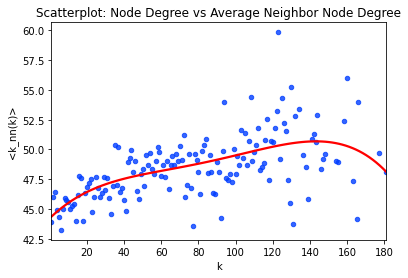

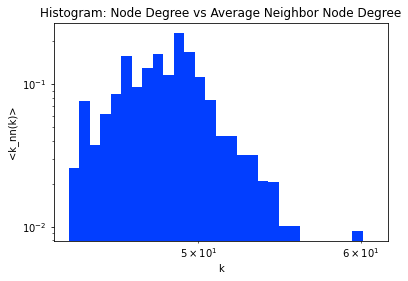

In [17]:
chess_graph = analyze_graph("./data/graph_chess.gml", "Chess Graph")
randomized_chess_graph = analyze_graph("./data_random/graph_chess_random.gml", "Randomized Chess Graph")

Average Degree: 15.679269149683767


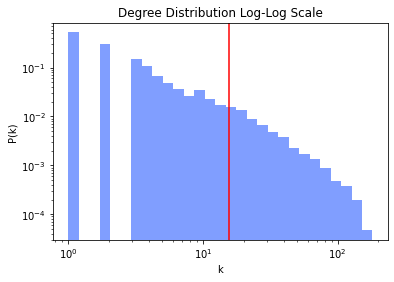

In [18]:
chess_graph_degrees = [chess_graph.degree()[i] for i in chess_graph.nodes()]
plot_degree_distribution(chess_graph_degrees, xscale='log', yscale='log')

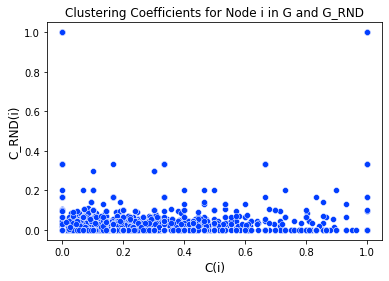

In [19]:
show_degree_distribution(chess_graph, randomized_chess_graph)

## 4. Condensed Matter Arxiv collaborations

--- CondMat Graph ---
Assortativity Coefficient of G: 0.12528250398544846


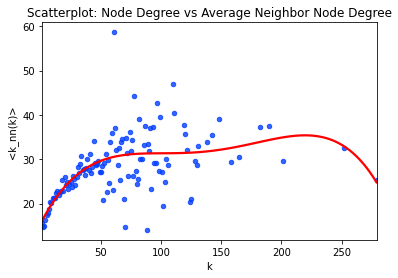

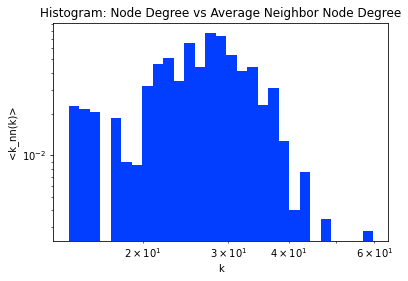

--- Randomized CondMat Graph ---
Assortativity Coefficient of G: 0.01062613662239224


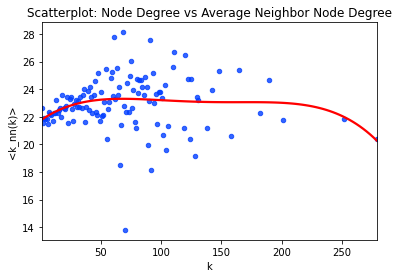

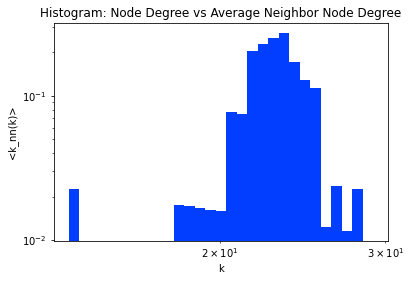

In [20]:
condmat_graph = analyze_graph("./data/graph_CondMat.gml", "CondMat Graph")
randomized_condmat_graph = analyze_graph("./data_random/graph_CondMat_random.gml", "Randomized CondMat Graph")

Average Degree: 8.546177971258718


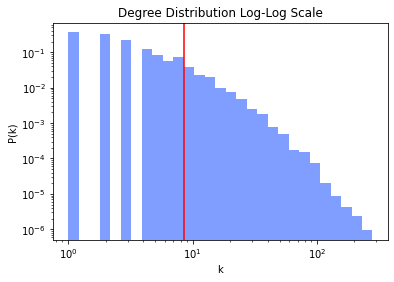

In [21]:
condmat_graph_degrees = [condmat_graph.degree()[i] for i in condmat_graph.nodes()]
plot_degree_distribution(condmat_graph_degrees, xscale='log', yscale='log')

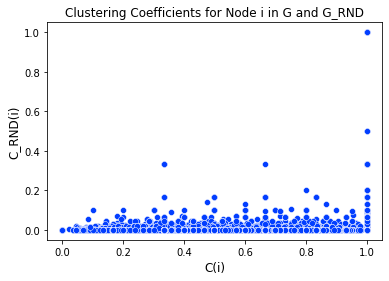

In [22]:
show_degree_distribution(condmat_graph, randomized_condmat_graph)

## 5. Dolphin Social Network

--- Dolphin Graph ---
Assortativity Coefficient of G: -0.04359402821531252


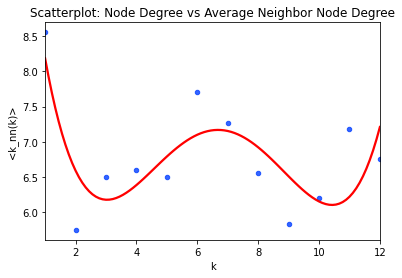

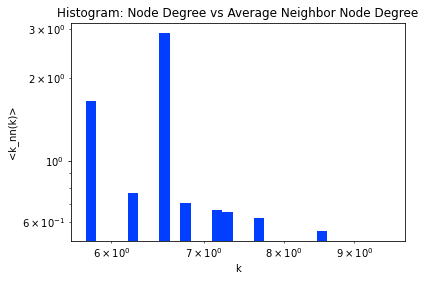

--- Randomized Dolphin Graph ---
Assortativity Coefficient of G: -0.15596767566086744


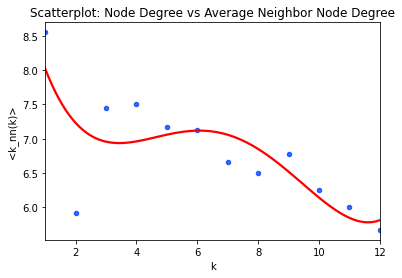

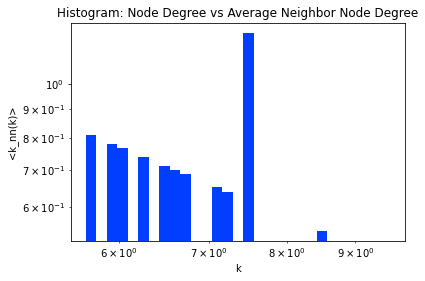

In [23]:
dolphin_graph = analyze_graph("./data/graph_dolphins.gml", "Dolphin Graph")
randomized_dolphin_graph = analyze_graph("./data_random/graph_dolphins_random.gml", "Randomized Dolphin Graph")

Average Degree: 5.129032258064516


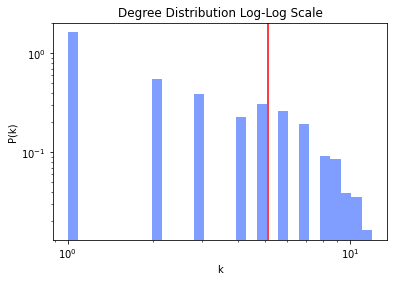

In [24]:
dolphin_graph_degrees = [dolphin_graph.degree()[i] for i in dolphin_graph.nodes()]
plot_degree_distribution(dolphin_graph_degrees, xscale='log', yscale='log')

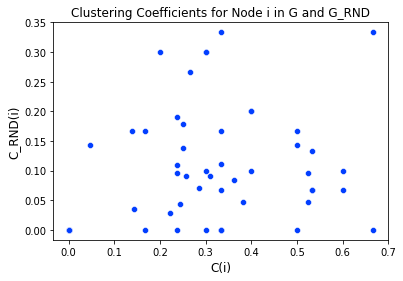

In [25]:
show_degree_distribution(dolphin_graph, randomized_dolphin_graph)

## 6. European Airline Network

--- Airline Graph ---
Assortativity Coefficient of G: -0.15180413274193827


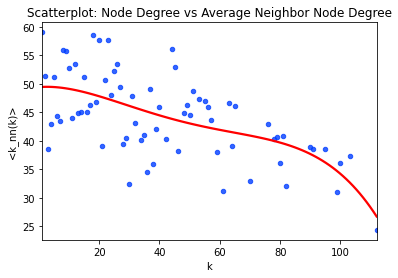

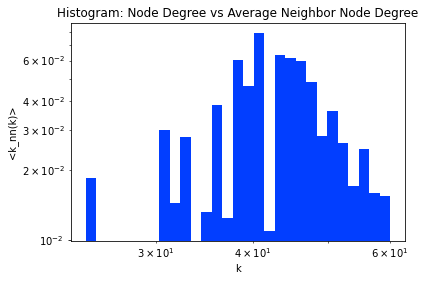

--- Randomized Airline Graph ---
Assortativity Coefficient of G: -0.22392762344094433


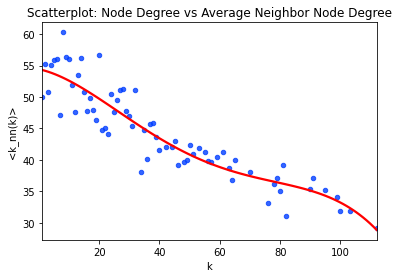

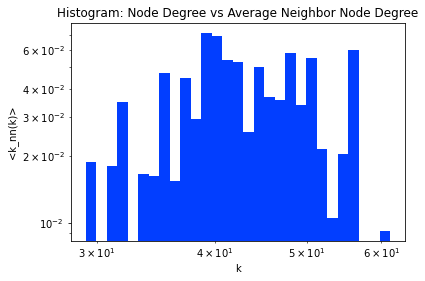

In [26]:
airline_graph = analyze_graph("./data/graph_eu_airlines.gml", "Airline Graph")
randomized_airline_graph = analyze_graph("./data_random/graph_eu_airlines_random.gml", "Randomized Airline Graph")

Average Degree: 14.16306954436451


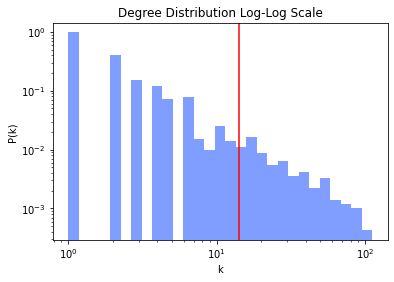

In [27]:
airline_graph_degrees = [airline_graph.degree()[i] for i in airline_graph.nodes()]
plot_degree_distribution(airline_graph_degrees, xscale='log', yscale='log')

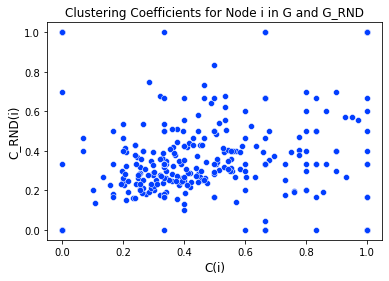

In [28]:
show_degree_distribution(airline_graph, randomized_airline_graph)

## 7. Facebook Friendships

--- Facebook Graph ---
Assortativity Coefficient of G: 0.0635772291856496


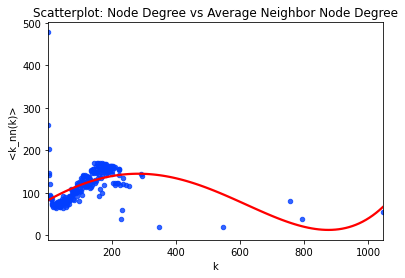

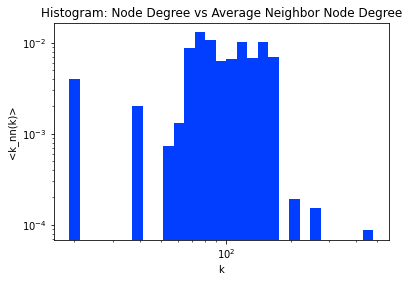

--- Randomized Facebook Graph ---
Assortativity Coefficient of G: -0.03469329042239884


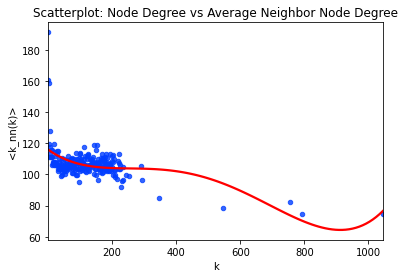

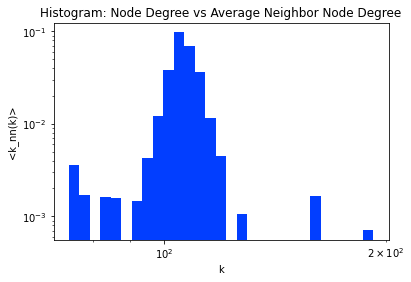

In [29]:
facebook_graph = analyze_graph("./data/graph_facebook.gml", "Facebook Graph")
randomized_facebook_graph  = analyze_graph("./data_random/graph_facebook_random.gml", "Randomized Facebook Graph")

Average Degree: 43.69101262688784


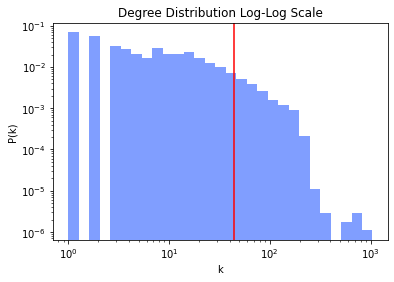

In [30]:
facebook_graph_degrees = [facebook_graph.degree()[i] for i in facebook_graph.nodes()]
plot_degree_distribution(facebook_graph_degrees, xscale='log', yscale='log')

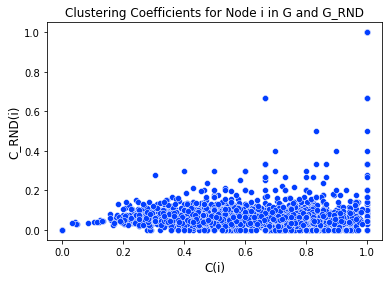

In [31]:
show_degree_distribution(facebook_graph, randomized_facebook_graph)

## 8. Florentine families

--- Florentine Families Graph ---
Assortativity Coefficient of G: -0.4786286731967932


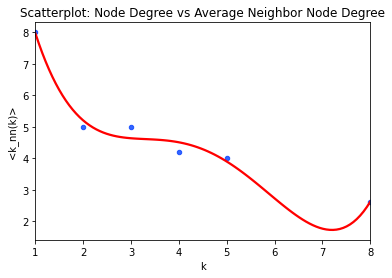

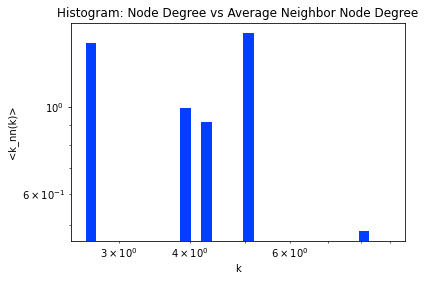

--- Randomized Florentine Families Graph ---
Assortativity Coefficient of G: -0.009795191451470063


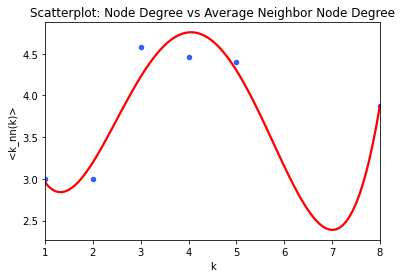

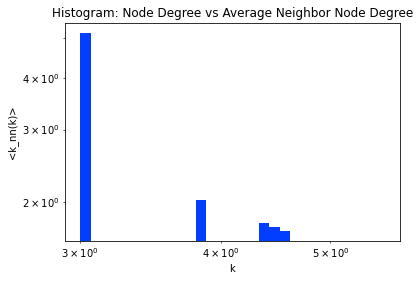

In [32]:
families_graph = analyze_graph("./data/graph_florentine_families.gml", "Florentine Families Graph")
randomized_families_graph = analyze_graph("./data_random/graph_florentine_families_random.gml", "Randomized Florentine Families Graph")

Average Degree: 3.6


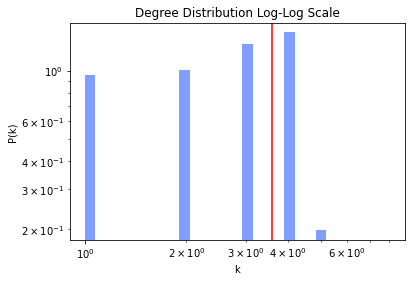

In [33]:
families_graph_degrees = [families_graph.degree()[i] for i in families_graph.nodes()]
plot_degree_distribution(families_graph_degrees, xscale='log', yscale='log')

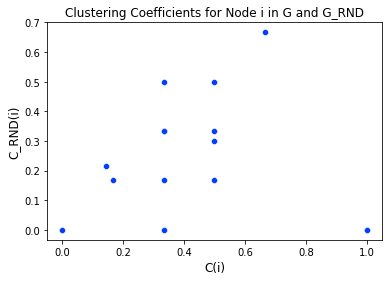

In [34]:
show_degree_distribution(families_graph, randomized_families_graph)

## 9. Game of Thrones Coappearances

--- Game of Thrones Graph ---
Assortativity Coefficient of G: -0.13076968366930292


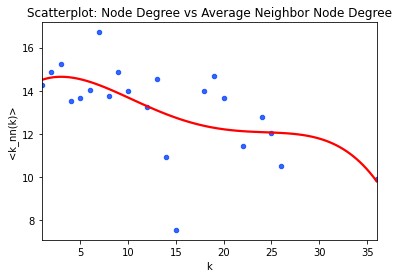

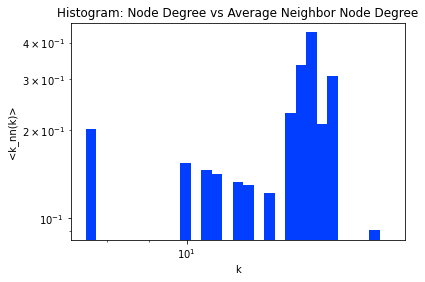

--- Randomized Game of Thrones Graph ---
Assortativity Coefficient of G: -0.16322657365747306


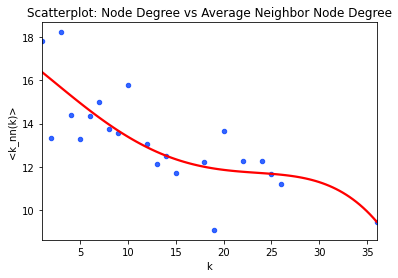

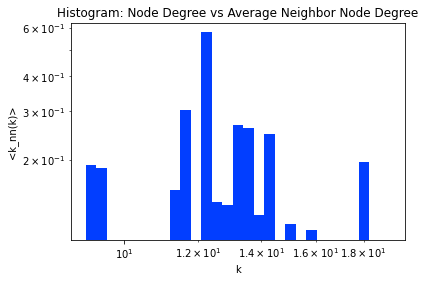

In [35]:
thrones_graph  = analyze_graph("./data/graph_game_thrones.gml", "Game of Thrones Graph")
randomized_thrones_graph = analyze_graph("./data_random/graph_game_thrones_random.gml", "Randomized Game of Thrones Graph")

Average Degree: 6.579439252336448


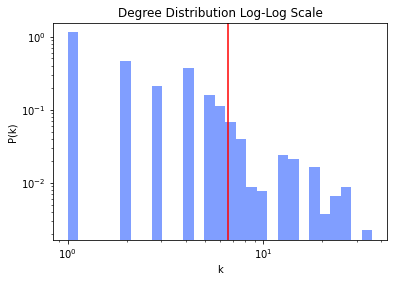

In [36]:
thrones_graph_degrees = [thrones_graph.degree()[i] for i in thrones_graph.nodes()]
plot_degree_distribution(thrones_graph_degrees, xscale='log', yscale='log')

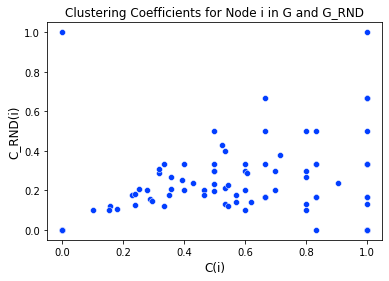

In [37]:
show_degree_distribution(thrones_graph, randomized_thrones_graph)

## 10. Internet AS Graph

--- Internet Graph ---
Assortativity Coefficient of G: -0.21486656615730243


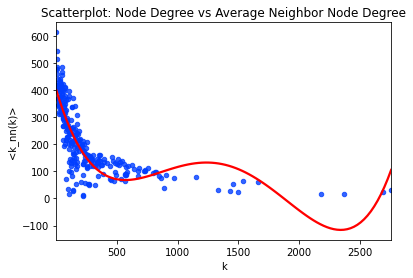

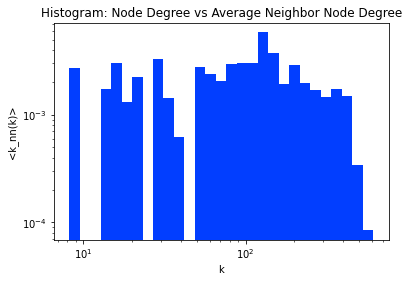

--- Randomized Internet Graph ---
Assortativity Coefficient of G: -0.1977818989871791


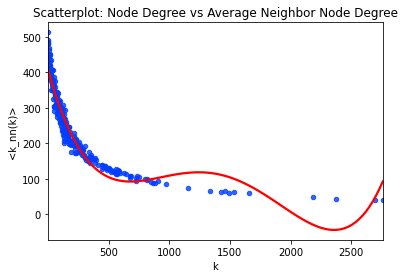

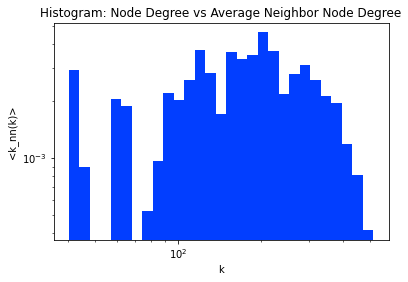

In [38]:
internet_graph  = analyze_graph("./data/graph_internet.gml", "Internet Graph")
randomized_internet_graph = analyze_graph("./data_random/graph_internet_random.gml", "Randomized Internet Graph")

Average Degree: 6.197750352406432


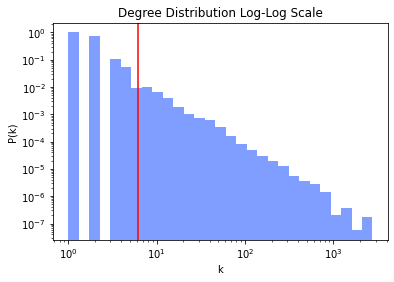

In [39]:
internet_graph_degrees = [internet_graph.degree()[i] for i in internet_graph.nodes()]
plot_degree_distribution(internet_graph_degrees, xscale='log', yscale='log')

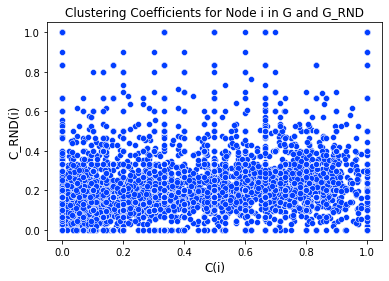

In [40]:
show_degree_distribution(internet_graph, randomized_internet_graph)

## 11. Jazz Collaboration Network

--- Jazz Graph ---
Assortativity Coefficient of G: 0.02023739927504758


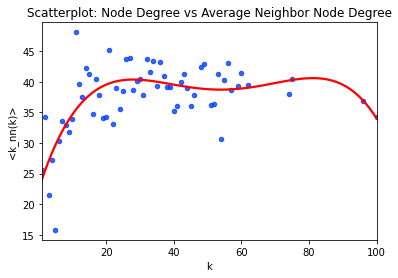

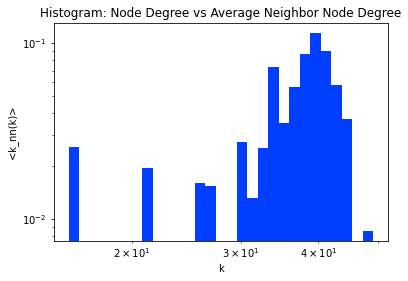

--- Randomized Jazz Graph ---
Assortativity Coefficient of G: -0.07266930692131274


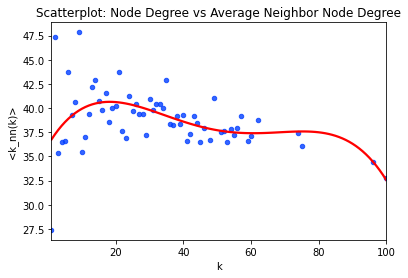

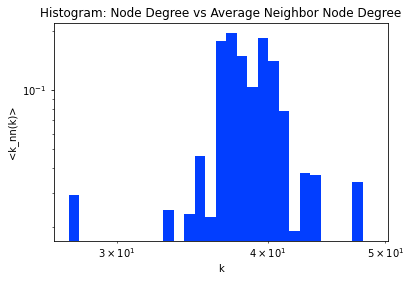

In [41]:
jazz_graph  = analyze_graph("./data/graph_jazz_collab.gml", "Jazz Graph")
randomized_jazz_graph = analyze_graph("./data_random/graph_jazz_collab_random.gml", "Randomized Jazz Graph")

Average Degree: 27.696969696969695


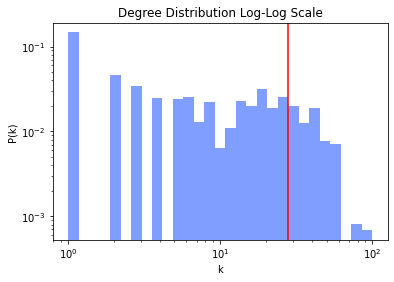

In [42]:
jazz_graph_degrees = [jazz_graph.degree()[i] for i in jazz_graph.nodes()]
plot_degree_distribution(jazz_graph_degrees, xscale='log', yscale='log')

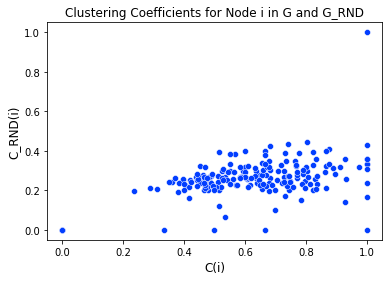

In [43]:
show_degree_distribution(jazz_graph, randomized_jazz_graph)

## 12. Terrorist Network

--- Terrorists Graph ---
Assortativity Coefficient of G: -0.08047566178575724


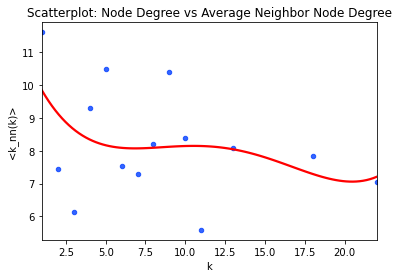

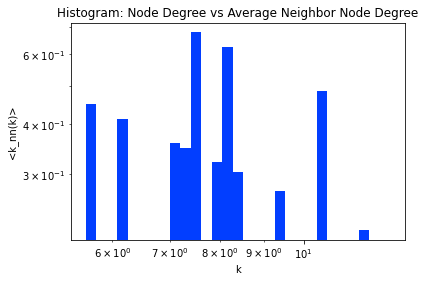

--- Randomized Terrorists Graph ---
Assortativity Coefficient of G: -0.071772419716363


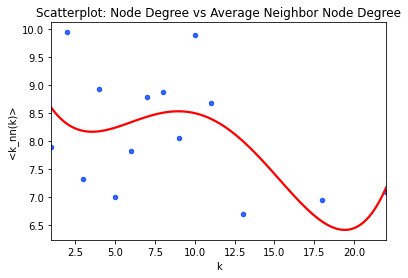

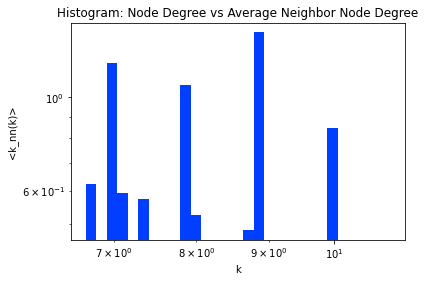

In [44]:
terrorist_graph  = analyze_graph("./data/graph_terrorists.gml", "Terrorists Graph")
randomized_terrorist_graph = analyze_graph("./data_random/graph_terrorists_random.gml", "Randomized Terrorists Graph")

Average Degree: 4.903225806451613


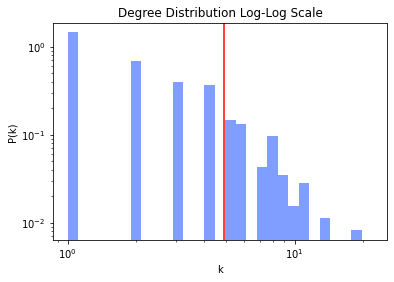

In [45]:
terrorist_graph_degrees = [terrorist_graph.degree()[i] for i in terrorist_graph.nodes()]
plot_degree_distribution(terrorist_graph_degrees, xscale='log', yscale='log')

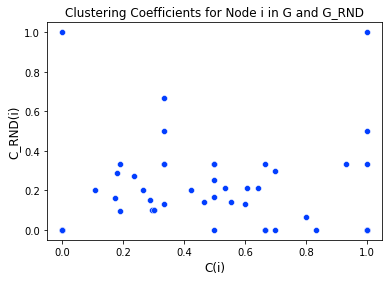

In [46]:
show_degree_distribution(terrorist_graph, randomized_terrorist_graph)